# 1D Heat Equation (Numerical Solution)

## Problem:

A bar of 10 meters with thermal diffusivity $\alpha = 0.89 \ m^2/s$ at initially $0\degree C$ is being heated from both ends. Temperature of the left heat source is $100\degree C$ and right heat source is $200\degree C$.

System is steady state (Temperature distribution doesn't change over time) with no internal heat generation.

Calculate change in temperature in space and time.

## Solution:

The equation governing the heat conduction in a one-dimensional rod without any internal heat generation and steady state is given by:

$$ \frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} $$

Where:
- $T$ is the temperature of the rod.
- $t$ is time.
- $x$ is the spatial coordinate along the length of the rod.
- $\alpha$ is the thermal diffusivity of the material.


### Discretization Using Finite Differences

The spatial domain is discretized into small segments of size $\Delta x $ (denoted as `dx` in the code), and the time domain is discretized into small time steps of size $ \Delta t $ (`dt` in the code). The spatial position and time can be represented by `x[i]` and `t[j]`, respectively.

The second spatial derivative can be approximated using a central difference scheme as:

$ \frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta x^2} $


The first temporal derivative can be approximated using a forward difference scheme as:

$ \frac{\partial T}{\partial t} \approx \frac{T_{i,j+1} - T_{i,j}}{\Delta t} $

### Explicit Scheme for Time Evolution:

Plugging the above approximations into the heat equation, we get:

$$ \frac{T_{i,j+1} - T_{i,j}}{\Delta t} = \alpha \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta x^2} $$

Rearranging the terms, we get the formula for the temperature at the next time step:

$$ T_{i,j+1} = \alpha \frac{\Delta t}{\Delta x^2} (T_{i+1,j} - 2T_{i,j} + T_{i-1,j}) + T_{i,j} $$

### Boundary Conditions:


The ends of the rod are maintained at constant temperatures, which are:

$ T_{0,j} = \text{temp\_left} $

$ T_{N,j} = \text{temp\_right} $

where $ N $ is the number of spatial grid points.

### Explanation:
The heat equation describes how heat diffuses through the rod over time. By discretizing the spatial and temporal domains, we turn the continuous problem into a series of calculations on a grid. The explicit scheme updates the temperature values at each grid point based on the neighboring grid points, progressing forward in time.

The given boundary conditions specify the temperatures at the ends of the rod. These temperatures remain constant throughout the simulation. 

By iterating through the time steps and updating the temperature values using the derived formula, the code simulates the heat diffusion in the rod over the specified time period. The result is a temperature distribution across the rod for each time step.



In [10]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [11]:
length = 10 # meter
k = 0.89 # m2/s
total_sim_time = 10

# Boundary Conditions:
temp_left = 100 # C
temp_right = 200 # C

In [12]:
# Spacial step & vector:

dx = 0.1 # meter
x_vector = np.arange(0, length + dx, dx)

# Temporal step & vector:
dt = 0.0001 # seconds
t_vector = np.arange(0, total_sim_time + dt, dt)

In [13]:
# Initial Condition:
T = np.zeros((len(t_vector), len(x_vector)))

In [14]:
T.shape

(100001, 101)

In [15]:
# Impose Boundary Conditions, equalling to the heat source at the edges:
T[:, 0] = temp_left
T[:, -1] = temp_right

In [16]:
T

array([[100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       ...,
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.]])

# Initial Condition:

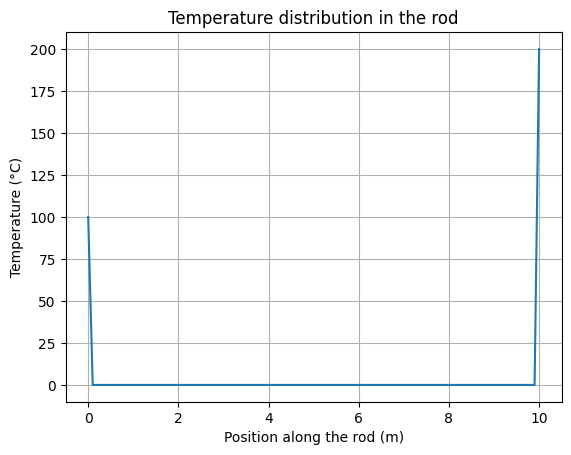

In [17]:
# Initial Condition:
plt.plot(x_vector, T[-1, :])
plt.xlabel("Position along the rod (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature distribution in the rod")
plt.grid(True)
plt.show()

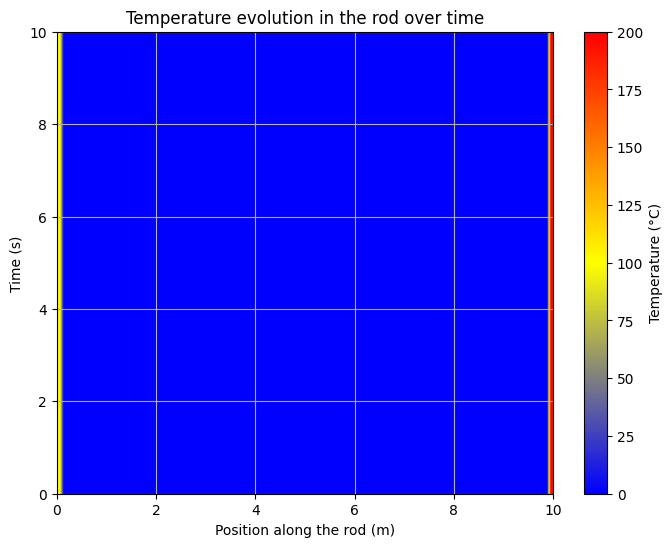

In [18]:
# Define custom colormap
colors = [(0, "blue"), (0.5, "yellow"), (1, "red")]
cmap_name = "custom_diverging"
norm = mcolors.Normalize(vmin = 0, vmax = 200) # Normalize based on your temperature range
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(T, aspect = "auto", cmap = cm, norm = norm, origin = "lower", extent = [0, length, 0, total_sim_time])
plt.colorbar(c, ax = ax, label = "Temperature (°C)")
ax.set_xlabel("Position along the rod (m)")
ax.set_ylabel("Time (s)")
ax.set_title("Temperature evolution in the rod over time")
plt.grid(True)
plt.show()

# Solve:

In [19]:
# Solve:
# Exclude boundary from updating
for t in range(1, len(t_vector) - 1): 
    for x in range(1, len(x_vector) - 1):
        T[t+1, x] = (k * (dt/dx**2)) * (T[t, x+1] - 2*T[t, x] + T[t, x-1]) + T[t, x]

# Final Condition:

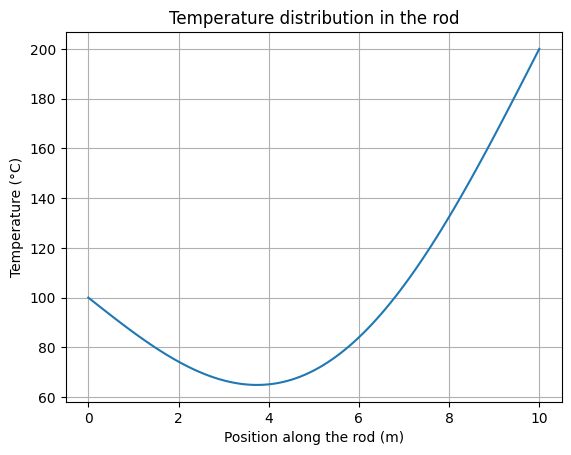

In [20]:
plt.plot(x_vector, T[-1, :])
plt.xlabel("Position along the rod (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature distribution in the rod")
plt.grid(True)
plt.show()

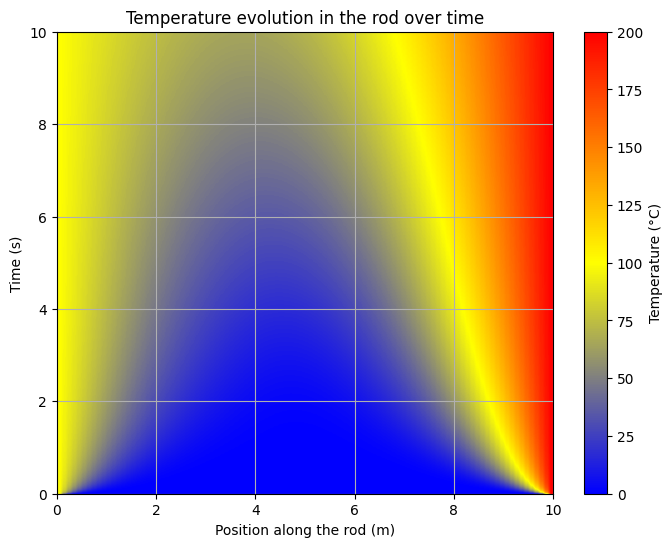

In [21]:
# Define custom colormap
colors = [(0, "blue"), (0.5, "yellow"), (1, "red")]
cmap_name = "custom_diverging"
norm = mcolors.Normalize(vmin = 0, vmax = 200) # Normalize based on your temperature range
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(T, aspect = "auto", cmap = cm, norm = norm, origin = "lower", extent = [0, length, 0, total_sim_time])
plt.colorbar(c, ax = ax, label = "Temperature (°C)")
ax.set_xlabel("Position along the rod (m)")
ax.set_ylabel("Time (s)")
ax.set_title("Temperature evolution in the rod over time")
plt.grid(True)
plt.show()